### Import Dataset

Referensi Dataset :

https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [559]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

### 1 . Exploratory Data Analysis

#### a. Banyak penumpang dalam data

In [560]:
with pd.option_context('display.max_colwidth', None):
  display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Dari cuplikan dataset di atas, terlihat bahwa terdapat 891 penumpang kapal titanic yang terdata.

In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### b. Jumlah penumpang yang selamat dan tidak selamat : tabel dan grafik

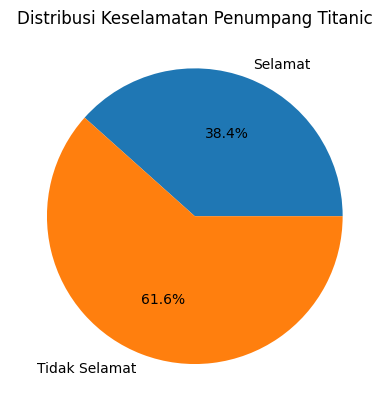

In [562]:
# penumpang selamat dan selamat, tabel dan grafik.
# menggunakan kolom "Survived" untuk men-split dataset ke selamat dan tidak selamat.

survived_data = data.loc[(data["Survived"] == 1)]
deceased_data = data.loc[(data["Survived"] != 1)]

# tabel selamat/tidak selamat dan grafiknya
table = {"Selamat" : [survived_data.count()["Survived"]],
         "Tidak Selamat" : [deceased_data.count()["Survived"]]}

survival_data = pd.DataFrame(table)
survival_data.head()

# pie chart dari tabel
stats = [table['Selamat'][0], table['Tidak Selamat'][0]]
labels = ["Selamat", "Tidak Selamat"]
plt.pie(stats, labels = labels, autopct='%1.1f%%')
plt.title('Distribusi Keselamatan Penumpang Titanic')
plt.show()

#### c. Rata-rata umur penumpang dan identifikasi penumpant tertua dan termuda

In [563]:
data.describe()["Age"]

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Didapat dari tabel di atas bahwa rata-rata umur penumpang adalah 29.699118

Berikut dicari penumpang tertua dan termuda berdasarkan nilai min dan max umur dari tabel di atas: <br>
0.42 dan 80

In [564]:
# penumpang termuda
termuda = data.loc[(data["Age"] == 0.42)]
termuda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [565]:
# penumpang tertua
tertua = data.loc[(data["Age"] == 80)]
tertua.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Didapat penumpang tertua adalah Assad Alexander Thomas

Dan penumpang termuda adalah Algernon Henry Wilson Barkworth

#### d. Banyak penumpang berdasarkan jenis kelamin dan grafiknya

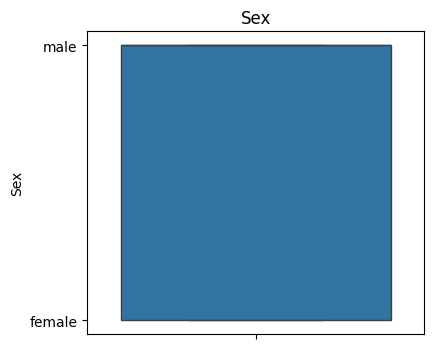

In [566]:
gender = data[["Sex"]]

num_cols = gender.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=gender[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Terkonfirmasi hanya ada 2 gender pada dataset. lanjut ke pembuatan grafik

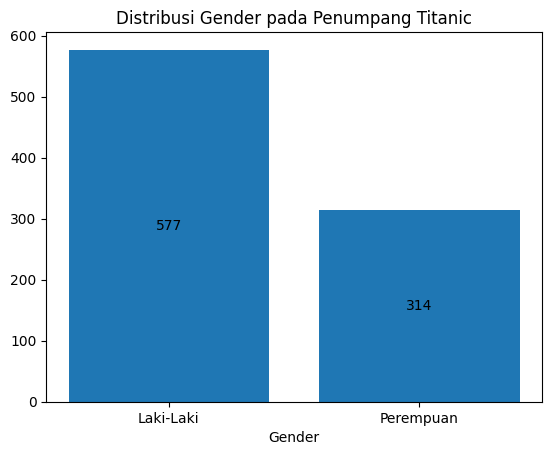

In [567]:
lakiLaki = data.loc[(data["Sex"] == "male")]
perempuan = data.loc[(data["Sex"] == "female")]

# plt.bar()

laki_count = lakiLaki.count()["Sex"]
perem_count = perempuan.count()["Sex"]

labels = ["Laki-Laki", "Perempuan"]
values = [laki_count, perem_count]

container = plt.bar(labels, values )
plt.title('Distribusi Gender pada Penumpang Titanic')
plt.xlabel('Gender')
plt.bar_label(container, label_type = "center")
plt.show()

Dari plot di atas, jelas mayoritas penumpang adalah laki-laki(577) dibandingkan dengan perempuan(314)

#### e. Banyak penumpang dalam tiap kelas dan persentase dalam kelas 1

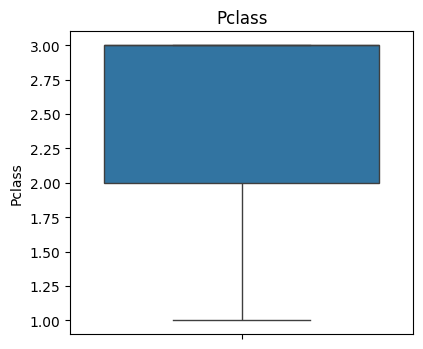

In [568]:
kelas = data[["Pclass"]]

num_cols = kelas.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=kelas[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Didapat dari boxplot di atas bahwa hanya terdapat sedikit penumpang yang berada pada kelas 1, sedangkan mayoritas penumpang merupakan kelas 2 atau 3 (sampling dataset dan *common sense* menunjukkan tidak ada kelas desimal)

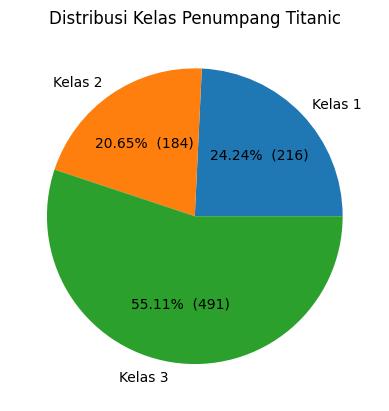

In [569]:
# kalkulasi banyak penumpang per kelas
kelas_1 = data.loc[(data["Pclass"] == 1)]
kelas_2 = data.loc[(data["Pclass"] == 2)]
kelas_3 = data.loc[(data["Pclass"] == 3)]

kelas1_count = kelas_1.count()["Pclass"]
kelas2_count = kelas_2.count()["Pclass"]
kelas3_count = kelas_3.count()["Pclass"]

# plotting
stats = [kelas1_count, kelas2_count, kelas3_count]
labels = ["Kelas 1", "Kelas 2", "Kelas 3"]

# fungsi untuk menampilkan label persentase dan banyak penumpang
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(stats, labels = labels, autopct = make_autopct(stats))
plt.title('Distribusi Kelas Penumpang Titanic')


plt.show()

Didapat dari piechart di atas bahwa penumpang titanic terbagi menjadi 3 kelas :

1. Kelas 1 : 216 orang (24,24%)
2. Kelas 2 : 184 orang (20,65%)
3. Kelas 3 : 491 orang (55,11%)

Dapat disimpulkan pula persentase penumpang pada kelas 1 adalah 55,11%.

### 2. Data Preprocessing

#### a. Identifikasi Missing Value

In [570]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Dari tabel di atas, dapat disimpulkan bahwa dataset memiliki nilai missing value pada :
- Variabel Age sebanyak 177
- Variabel Cabin sebanyak 687
- Variabel Embarked sebanyak 2

Berikut akan dilakukan handling missing value.

#### b. Handling Missing Value

Handling missing value akan menggunakan metode yang sesuai dengan tipe data tiap variabel.

Berikut akan dilakukan identifikasi tipe data variabel dan cara terbaik untuk menangani missing value nya

In [571]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


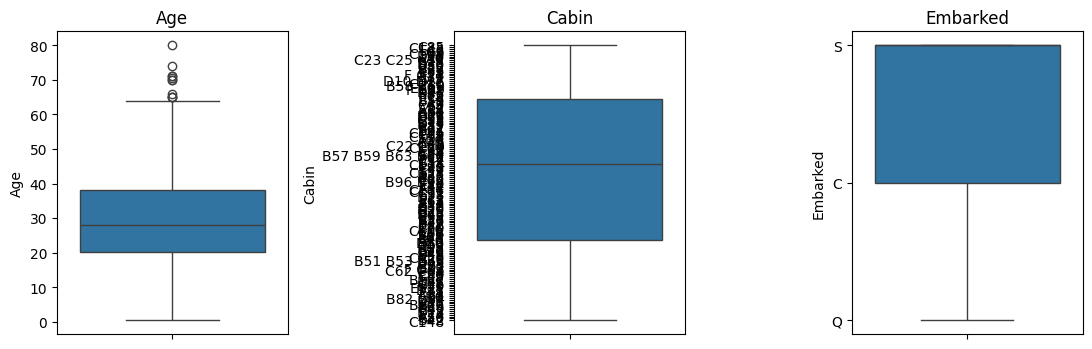

In [572]:
missings = data[["Age", "Cabin", "Embarked"]]

num_cols = missings.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=missings[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- Variabel Age

Nilai variabel memiliki nilai numerik, akan dilakukan pengisian missing value dengan median.

- Variabel Cabin

Nilai variabel sangat bervariasi, baiknya missing value diberi nilai "unknown" agar tidak membuat asumsi yang berpotensi membuat bias.

- Variabel Embarked

Missing value hanya 2, ambil modus saja karena variabel bernilai kategorik.

In [573]:
# fill NA with median
data["Age"] = data["Age"].fillna(data["Age"].median())

# fill NA with "Unknown"
data["Cabin"] = data["Cabin"].fillna("Unknown")

# fill NA with mode(modus)
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [574]:
sum(np.sum(data.isnull(), axis=None))

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0

Didapat dataset yang telah terhandle NA-nya

#### c. Deteksi Outlier

Outlier adalah datum/data/baris yang memiliki nilai yang jauh dari normal (terlalu tinggi atau terlalu rendah).

Deteksi outlier termudah adalah dengan menggunakan boxplot. <br>
Jika terdapat suatu lingkaran di luar kotak, maka dapat dipastikan itu adalah outlier.

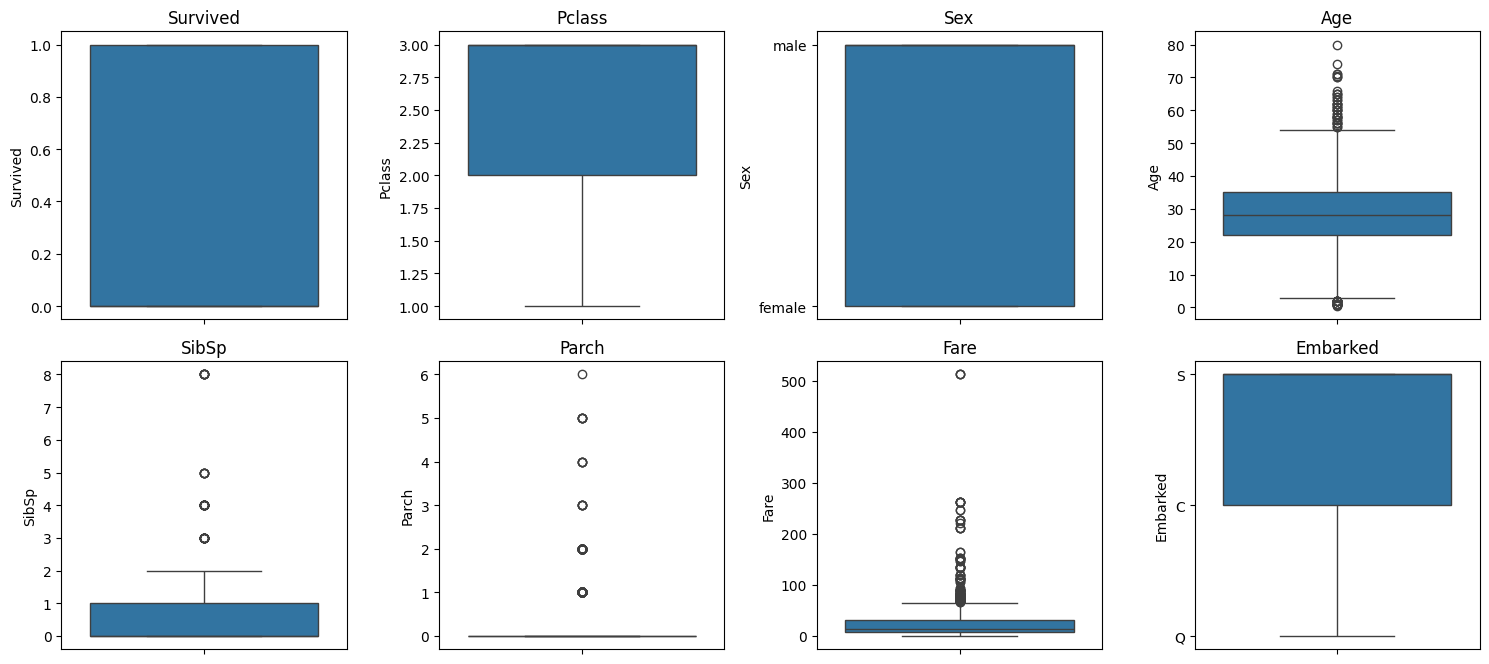

In [575]:
# eliminasi kolom dengan nilai unik (tidak membentuk kelompok/kluster/kategori)
outliers = data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

num_cols = outliers.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=outliers[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Ditemukan outlier pada variabel :
1. Age (umur)
2. SibSp (banyak saudara kandung dan suami/istri di kapal)
3. Parch (banyak orang tua dan anak di kapal)
4. Fare (harga tiket)

#### d. Urgensi transformasi data outlier

Pada ketiga variabel di atas, sepertinya variabel age perlu dilakukan winsorizing untuk simplifikasi algoritma.

Untuk variabel SibSp, outlier hanya 4 titik. dapat dihapus atau dilakukan winsorizing.

Sedangkan untuk variabel Fare(biaya tiket), normalisasi dinilai perlu karena outlier tertinggi sangat jauh dari median dan banyak juga outlier di bawah nilai tertinggi ini. Lakukan winsorizing.

####  e. Transformasi/Standarisasi/Normalisasi

In [576]:
# masukkan variabel data ke df untuk backup
df = data



winsor_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
print("Sebelum Winsorizing : ")
for col in winsor_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in winsor_cols:
    winsorize_iqr(df, col)

print("\nSetelah Winsorizing : ")
for col in winsor_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

Sebelum Winsorizing : 
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers

Setelah Winsorizing : 
Survived: 0 outliers
Pclass: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


<ipython-input-577-c3163c8bee63>:7: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


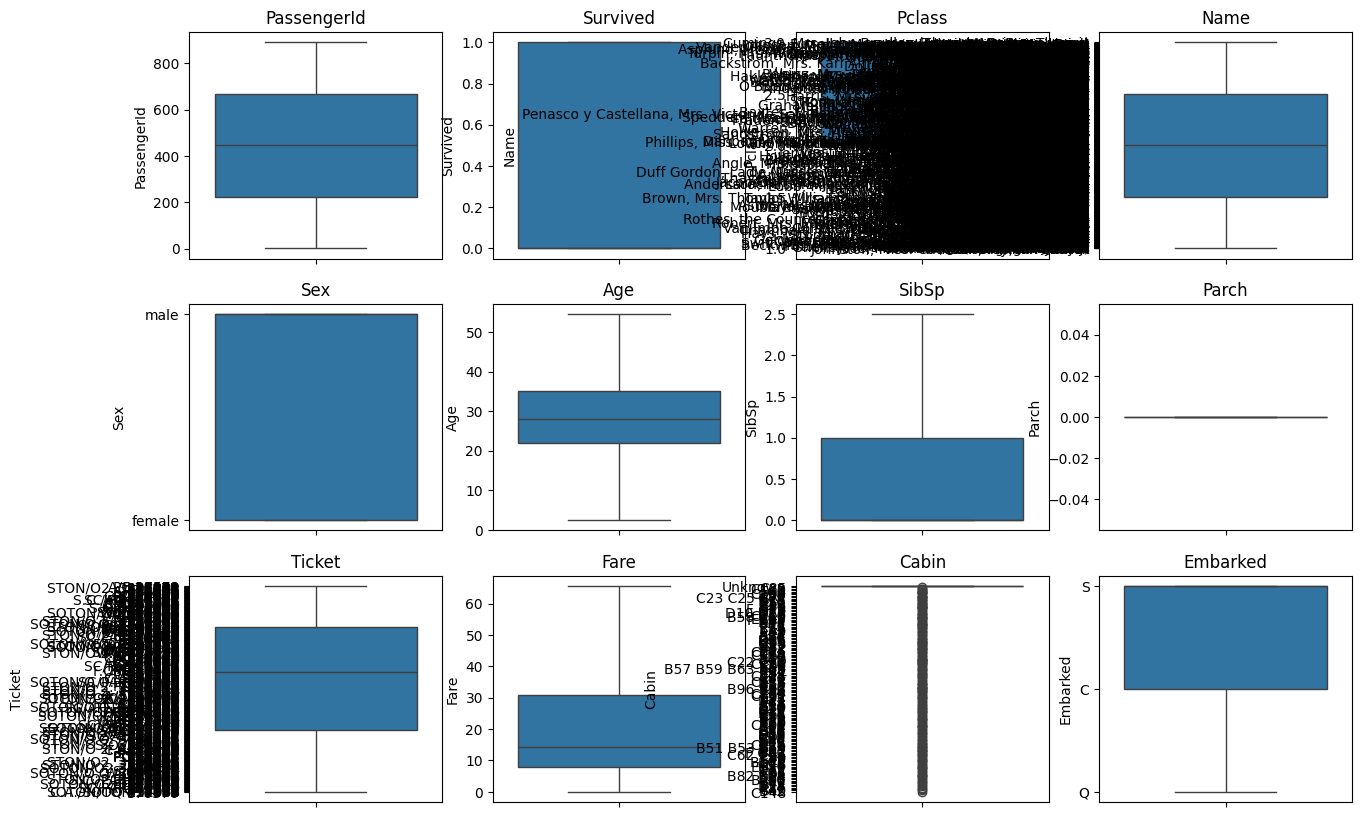

In [577]:
num_cols = df.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Outlier telah ter-handle.

### 3. Modelling

#### a. Urgensi pembagian data training dan testing

Sebelum fitting model dilakukan, dataset perlu dibagi menjadi data training dan data testing.

Data training akan digunakan untuk "mengajar" algoritma yang dipilih agar dapat menemukan pola dalam data dan "mengingat" pola tersebut sebagai sebuah model.

Sedangkan data testing digunakan untuk melakukan "ujian" sehingga performa model dapat diukur dengan menggunakan confusion matriks. Kesesuaian model akan diukur dengan berbagai ukuran seperti akurasi. Jika model tidak memenuhi target akurasi, training dilakukan ulang dengan parameter berbeda.

#### b. Persentase splitting dan alasannya

Untuk dataset yang relatif besar (>1000 baris), biasanya akan diambil 60% data training dan 40% data testing.

Sedangkan untuk dataset yang relatif sedikit (<1000 baris), akan diambil 70% training dan 30% testing untuk menambah banyak data yang bisa dipakai untuk training.

Jika persentase data training terlalu banyak dibandingkan data testing, ada kemungkinan model mengalami overfitting yang menyebabkan model berperforma buruk dengan dataset testing karena terlalu fokus pada pola lokal.

Sedangkan jika data testing terlalu banyak, kemungkinan overfitting dapat terjadi yang membuat model kurang paham akan pola dalam data dan sama-sama menyebabkan performa model memburuk.

#### c. Pembuatan 3 model klasifikasi dengan cara kerjanya

Berikut akan dibuat model klasifikasi untuk memprediksi apakah seorang penumpang titanic dapat bertahan hidup atau tidak dengan memperhatikan berbagai parameter.

Sebelum dilakukan analisis dan model fitting, perlu dilakukan preprocessing lebih lanjut terutama untuk melakukan encoding variabel kategorik

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 83.7+ KB


Untuk analisis lebih lanjut, kolom-kolom yang berisi nilai unik seperti ID dan Nama perlu dihapus karena tipe variabel ini hanya akan memberatkan proses training model dan tidak berkontribusi ke akurasi model.

Berikut variabel PassengerId, Name, Ticket, dan Cabin akan di-drop

In [579]:
df = df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])

Variabel unik dihapus, sekarang akan dilakukan encoding

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(6), object(2)
memory usage: 55.8+ KB


In [581]:
from sklearn.preprocessing import LabelEncoder

# transform categorical variables into numeric values
# note : nilai index terurut berdasarkan urutan alfabet pada konversi string
categories = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for cat in categories :
  le = LabelEncoder()
  label = le.fit_transform(df[cat])
  df[cat] = label

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,65.6344,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


Prep selesai. Kita bisa mulai modelling.
Berikut akan dibuat model Decision Tree

###### i. Decision Tree Classifier

Model ini menggunakan bentuk pohon keputusan yang memecah dataset menjadi berbagai kelompok berdasarkan suatu batas tertentu pada suatu variabel.

Misal model pertama membuat 2 kelompok, dipisahkan pada titik Age = 40. penumpang berumur <40 masuk kelompok 1, yang berumur >= 40 masuk kelompok 2. Kemudian pada kelompok 2 dipisahkan menjadi kelompok 3 dan 4 berdasarkan fare = 50$.

Dan seterusnya hingga terbentuk kelompok-kelompok yang dapat digunakan untuk memperkirakan keselamatan penumpang.

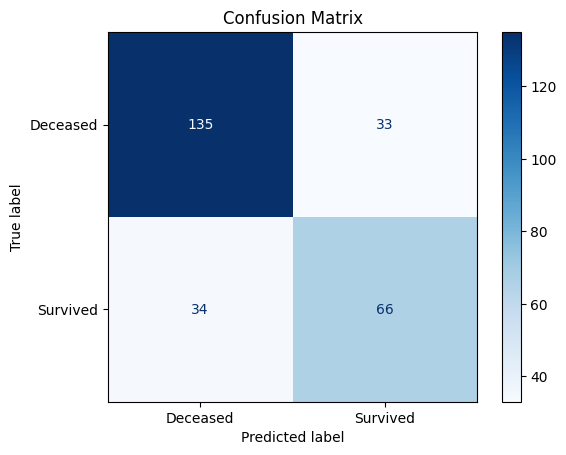

In [582]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pisahkan variabel target dan lainnya
X = df.drop(columns = ["Survived"])
Y = df["Survived"]
# Split dataset 70-30
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

Y_pred_dectree = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_dectree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Deceased", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Didapat sebuah model yang memiliki performa yang cukup bagus. terutama untuk suatu model sederhana seperti decision tree.

Berikut akan dibuat model dengan naive bayes :

ii. Naive Bayes Classifier

Naive bayes menggunakan model matematika berdasarkan Teori Bayes yang berkaitan dengan probabilitas.

Dengan rumus tertentu, model menghitung probabilitas seorang penumpang untuk dapat selamat atau tidak.

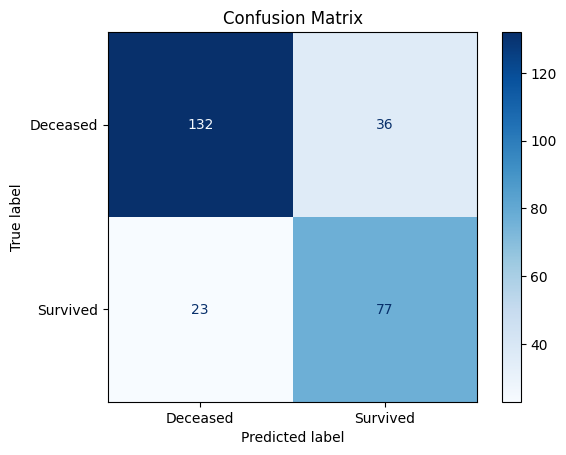

In [583]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
Y_pred_naiveb = gnb.fit(X_train, Y_train).predict(X_test)

cm = confusion_matrix(Y_test, Y_pred_naiveb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Deceased", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Didapat model dengan performa serupa dalam akurasi dengan model decision tree

##### iii. K-Nearest Neighbor Classifier

Model KNN cukup rumit, tetapi pada intinya model membuat kelompok-kelompok berdasarkan kedekatan titik-titik pada dataset dengan satu sama lain.

Semakin dekat suatu titik dengan titik lain, semakin mungkin mereka berada pada satu kelompok yang akhirnya menentukan kemungkinan seseorang untuk selamat atau tidak berdasarkan suatu formula.

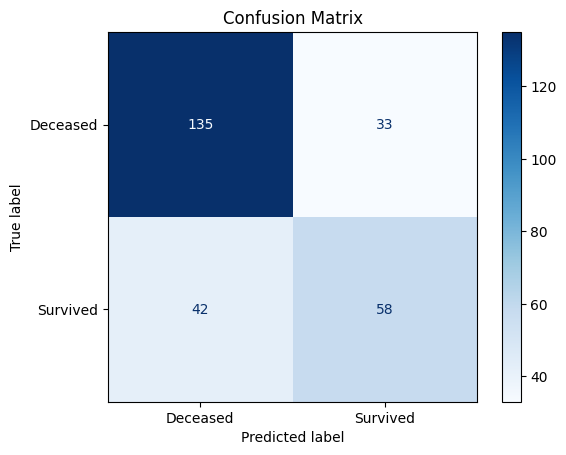

In [590]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
neigh_fit = neigh.fit(X_train, Y_train)
Y_pred_knn = neigh_fit.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Deceased", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Didapat classifier KNN yang nampaknya memiliki performa yang lebih buruk dari kedua sebelumnya karena false positive dan false negativenya lebih banyak.

#### d. Nilai evaluasi tiap model dan artinya

Akan dilakukan kalkulasi akurasi, precision, dan recall.

Performa model akan dibandingkan berdasarkan nilai-nilai ini dengan nilai persentase tertinggi berarti performa terbaik.

In [593]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# metrics decision tree
dectree_acc = accuracy_score(Y_test, Y_pred_dectree)
dectree_prec = precision_score(Y_test, Y_pred_dectree)
dectree_rec = recall_score(Y_test, Y_pred_dectree)

metric_dt = {"Accuracy" : [dectree_acc],
             "Precision" : [dectree_prec],
             "Recall" : [dectree_rec]}
pd.DataFrame(metric_dt).head()

,Accuracy,Precision,Recall
0,0.75,0.666667,0.66


In [594]:
# metric naive bayes
naiveb_acc = accuracy_score(Y_test, Y_pred_naiveb)
naiveb_prec = precision_score(Y_test, Y_pred_naiveb)
naiveb_rec = recall_score(Y_test, Y_pred_naiveb)

metric_nb = {"Accuracy" : [naiveb_acc],
             "Precision" : [naiveb_prec],
             "Recall" : [naiveb_rec]}
pd.DataFrame(metric_nb).head()

,Accuracy,Precision,Recall
0,0.779851,0.681416,0.77


In [595]:
# metric k-nearest neighbor
knn_acc = accuracy_score(Y_test, Y_pred_knn)
knn_prec = precision_score(Y_test, Y_pred_knn)
knn_rec = recall_score(Y_test, Y_pred_knn)

metric_knn = {"Accuracy" : [knn_acc],
             "Precision" : [knn_prec],
             "Recall" : [knn_rec]}
pd.DataFrame(metric_dt).head()

,Accuracy,Precision,Recall
0,0.75,0.666667,0.66


In [598]:
total_metric = {"Algoritma" : ["Decision Tree", "Naive Bayes", "K-Nearest Neighbor"],
             "Accuracy" : [dectree_acc, naiveb_acc, knn_acc],
             "Precision" : [dectree_prec, naiveb_prec, knn_prec],
             "Recall" : [dectree_rec, naiveb_rec, knn_rec]}
pd.DataFrame(total_metric).head()


,Algoritma,Accuracy,Precision,Recall
0,Decision Tree,0.750000,0.666667,0.66
1,Naive Bayes,0.779851,0.681416,0.77
2,K-Nearest Neighbor,0.720149,0.637363,0.58


Tabel di atas adalah tabel akumulasi metric performa dari ketiga algoritma atas dasar akurasi, presisi, dan recall.

Ketiga metrics di atas dihitung berdasarkan nilai true positive, true negative, false positive, dan false negative sebagai berikut :
2071dc7c-6ed9-4ec1-b4a9-adbe1b9d7cc1_Confusion+Matrix+-+Encord.avif

Akurasi = TP + TN / TP + TN + FP + FN

Precision = TP / TP + FP

Recall = TP / TP + FN

##### e. Perbandingan performa model

In [599]:
pd.DataFrame(total_metric).head()

,Algoritma,Accuracy,Precision,Recall
0,Decision Tree,0.750000,0.666667,0.66
1,Naive Bayes,0.779851,0.681416,0.77
2,K-Nearest Neighbor,0.720149,0.637363,0.58


Berdasarkan tabel di atas, performa model dari Naive Bayes adalah yang terbaik, baik itu dalam accuracy, precision, maupun recall.

Akan tetapi, untuk analisis dalam dunia nyata, akurasi 78% masih kurang layak karena standard pada sains adalah 95%.

#### 4. Evaluasi

##### a. Evaluasi model terbaik

In [601]:
total_metric = {"Algoritma" : ["Decision Tree", "Naive Bayes", "K-Nearest Neighbor"],
             "Accuracy" : [dectree_acc, naiveb_acc, knn_acc],
             "Precision" : [dectree_prec, naiveb_prec, knn_prec],
             "Recall" : [dectree_rec, naiveb_rec, knn_rec]}
pd.DataFrame(total_metric).head()


,Algoritma,Accuracy,Precision,Recall
0,Decision Tree,0.750000,0.666667,0.66
1,Naive Bayes,0.779851,0.681416,0.77
2,K-Nearest Neighbor,0.720149,0.637363,0.58


Dapat dilihat pada tabel performa di atas bahwa pada Naive Bayes,

- Precision = 0.6814
- Recall = 0.77

##### b. Banyak penumpang diprediksi selamat dan diantaranya, banyak yang benar-benar selamat

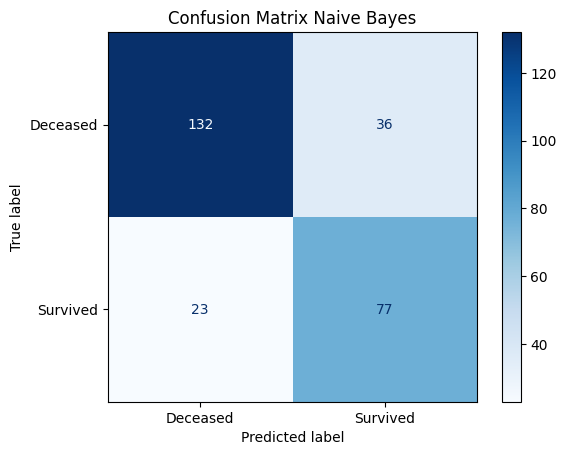

In [600]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
Y_pred_naiveb = gnb.fit(X_train, Y_train).predict(X_test)

cm = confusion_matrix(Y_test, Y_pred_naiveb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Deceased", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Naive Bayes')
plt.show()

Ditanyakan berapa penumpang yang diprediksi selamat. Maka perlu dilihat pada tabel bagian "Predicted Label" dan jumlahkan bagian survived

- Predicted Survived = 77 + 36 = 113
- Actually Survived from Predicted = 77